In [1]:
titles=open('data/titles.txt').read().split('\n')
synopses=open('data/synopses.txt').read().split('\n BREAKS HERE')
synopses=synopses[:100]
len(synopses)

100

In [2]:
print(synopses[0])

In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punish 

In [3]:
print(len(titles))
print(len(synopses))

100
100


In [4]:
import nltk
stopwords=nltk.corpus.stopwords.words('english')

In [5]:
#nltk.download()

In [6]:
print(stopwords)
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer=SnowballStemmer("english")

import nltk
import re
def tokenize(text):
    # 2-1. Text -> sentence -> word
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    final_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            final_tokens.append(token)
    #stems=[stemmer.stem(t) for t in final_tokens]
    return final_tokens

# 여기서 stopwords를 제거하지 않은 이유는 tfidfvectorizer() 함수에서 제거할 것이기 때문이다.

In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem('walked'))
print(stemmer.stem('walks'))
print(stemmer.stem('walking'))
print(stemmer.stem('walk'))

walk
walk
walk
walk


In [9]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer("english")

def tokenize_stem(text):
    # 2-1. Text -> sentence -> word
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    final_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            final_tokens.append(token)
    stems=[stemmer.stem(t) for t in final_tokens]
    return stems

In [10]:
print(tokenize_stem("Today is my birthday. Will you come to my party?"))

['today', 'is', 'my', 'birthday', 'will', 'you', 'come', 'to', 'my', 'parti']


In [11]:
#totalvocab_tokenized=[]
#for synop in synopses:
#    #each_tokenized=tokenize(synop)
#    each_tokenized=tokenize_stem(synop)
#    totalvocab_tokenized.extend(each_tokenized)

#print(len(totalvocab_tokenized))

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=200000, max_df=0.8, min_df=0.2, stop_words='english', tokenizer=tokenize_stem)

In [49]:
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
terms = tfidf_vectorizer.get_feature_names()
print(terms)

(100, 548)
["'d", 'abandon', 'abl', 'accept', 'accid', 'accompani', 'accus', 'act', 'action', 'actual', 'admit', 'afterward', 'ago', 'agre', 'air', 'aliv', 'allow', 'alon', 'alreadi', 'alway', 'american', 'angri', 'angrili', 'ani', 'announc', 'anoth', 'answer', 'anyon', 'anyth', 'apart', 'appar', 'appear', 'approach', 'area', 'argu', 'arm', 'armi', 'arrang', 'arrest', 'arriv', 'ask', 'assign', 'assist', 'assum', 'attack', 'attempt', 'attend', 'attent', 'attract', 'audienc', 'avoid', 'away', 'bad', 'bar', 'bare', 'battl', 'beat', 'becaus', 'becom', 'bed', 'beg', 'believ', 'best', 'better', 'big', 'black', 'blow', 'board', 'bodi', 'book', 'boss', 'boy', 'break', 'brief', 'bring', 'broken', 'brother', 'build', 'burn', 'busi', 'buy', 'ca', 'camp', 'captain', 'captur', 'car', 'care', 'career', 'carri', 'case', 'catch', 'caus', 'chanc', 'chang', 'charg', 'chase', 'child', 'children', 'citi', 'claim', 'clear', 'climb', 'close', 'cloth', 'club', 'cold', 'collaps', 'come', 'command', 'commit', 

In [50]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [51]:
print(clusters)

[3, 0, 3, 3, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2, 2, 3, 3, 0, 2, 0, 3, 0, 2, 2, 0, 1, 4, 2, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 4, 1, 3, 3, 3, 0, 0, 3, 2, 2, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 3, 4, 2, 4, 3, 3, 3, 1, 1, 1, 3, 4, 2, 3, 3, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1]


In [52]:
import pandas as pd
#ranks=[]                 # movie 라벨링 하기 위해서 1부터 100까지
#for i in range(1, 101):
#    ranks.append(i)

films = { 'title': titles, 'synopsis': synopses, 'cluster': clusters}
frame = pd.DataFrame(films, index = clusters , columns = ['title', 'cluster'])

In [53]:
frame

,title,cluster
3,The Godfather,3
0,The Shawshank Redemption,0
3,Schindler's List,3
3,Raging Bull,3
0,Casablanca,0
3,One Flew Over the Cuckoo's Nest,3
3,Gone with the Wind,3
1,Citizen Kane,1
3,The Wizard of Oz,3
2,Titanic,2


In [54]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

3    30
0    27
2    23
1    14
4     6
Name: cluster, dtype: int64

In [19]:
#vocab_frame = pd.DataFrame({'WORDS': totalvocab_tokenized})
#vocab_frame

In [67]:
#from __future__ import print_function

print("Top terms per cluster:")

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

print(order_centroids[:, :5])

for i in range(5):
    print("Cluster %d Topic(terms):" % i, end='')
    for j in range(5):
        print(terms[order_centroids[i][j]], end=',')
    print('\n') 
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print('\n')

Top terms per cluster:
[[277 458  83 ... 546 134  70]
 [206 326 451 ... 372 172 292]
 [ 85 366 277 ... 171 438 380]
 [197 199 246 ... 391 186 155]
 [218 308 536 ...  70 263  82]]


TypeError: list indices must be integers or slices, not tuple

In [21]:

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [85]:
#set up colors per clusters using a dict
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}

#set up cluster names using a dict
cluster_names = {0: 'Kill, Solider, Army', 
                 1: 'Sing, Love, Relationship', 
                 2: 'Car, Drive, Train', 
                 3: 'Family, Home, Brother', 
                 4: 'Marry, Woman, Friend'}

C:\Users\hsko0\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


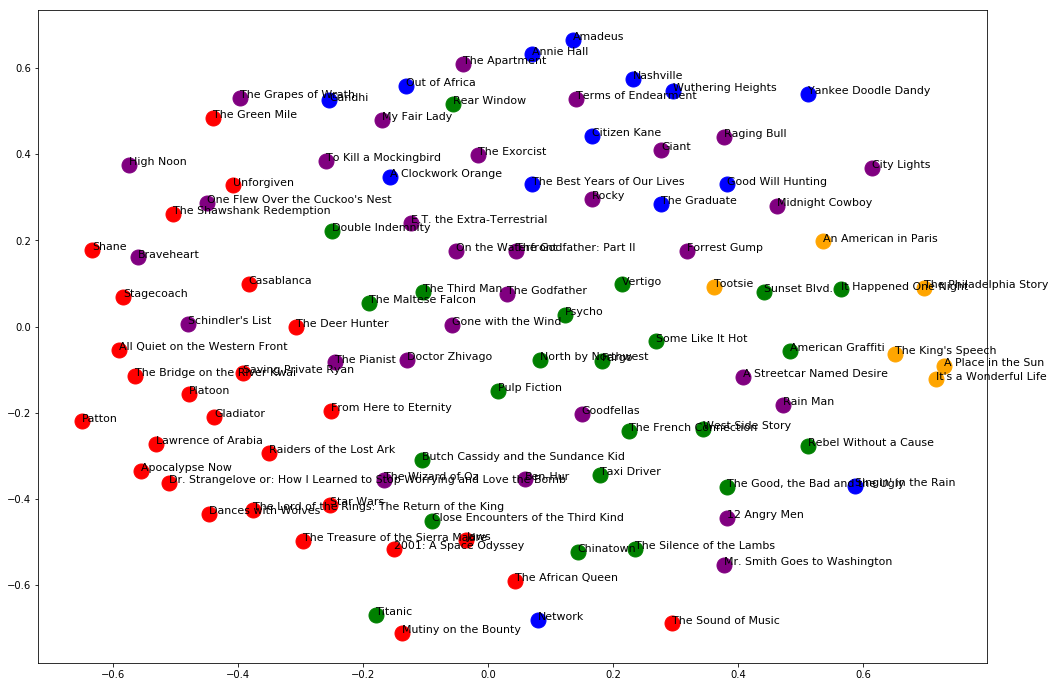

In [103]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
groups = df.groupby('label') #group by cluster


# set up plot
fig, ax = plt.subplots(figsize=(17, 12)) # set size

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=15, 
            label=cluster_names[name], color=cluster_colors[name])
#ax.legend(numpoints=1)  #show legend with only 1 point
#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=11)  
plt.show()